<a href="https://colab.research.google.com/github/taniae27/AprendizajeProfundo/blob/main/Tarea_1_Regresi%C3%B3n_lineal_con_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Regresión lineal con PyTorch

Entrena y evalúa un modelo de regresión lineal para el conjunto de datos de calificaciones que
considere los dos atributos de entrada.

Especificaciones

• Grafica los datos en 3D.

• Realiza la definición de la arquitectura usando tanto la interfaz de alto como la de medio nivel.

• Prueba distintos valores para los hiperparámetros.

• Realiza una predicción con tu modelo entrenado para la calificación que tendría un
alumno si sabemos que estudió durante 12 horas para el examen y en un examen previo
obtuvo 3 de calificación.

• Discute las modificaciones que realizaste y las distintas configuraciones para los hiperpa-
rámetros que probaste.

## Como primer paso consideramos las librerias necesarias para el ejercicio

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as T
from torchinfo import summary
from torch.utils.data import DataLoader, TensorDataset

#### i) Grafica los datos en 3D.

In [ ]:
URL = 'https://raw.githubusercontent.com/gibranfp/CursoAprendizajeProfundo/2023-1/data/califs/califs.csv'


In [ ]:
df = pd.read_csv(URL)

In [ ]:
df

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7
5,6.4,10.4,6.0
6,6.1,10.4,6.8
7,6.8,10.5,6.2
8,6.3,10.7,7.2
9,6.2,10.9,7.2


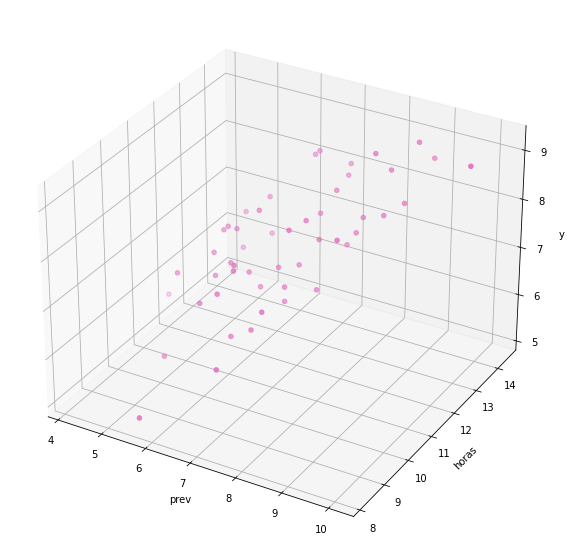

In [ ]:
x = np.array(df.iloc[:,:2].values, dtype="float32")
y = np.array(df.iloc[:,-1], dtype="float32")[..., np.newaxis]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y,
           color='tab:pink')
ax.set_xlabel('prev')
ax.set_ylabel('horas')
ax.set_zlabel('y')

plt.show()

#### ii) Realiza la definición de la arquitectura usando tanto la interfaz de alto como la de medio nivel.

In [ ]:
X=torch.from_numpy(x)
Y=torch.from_numpy(y)
ds = TensorDataset(X, Y)

def build_dl(batch_size=50, shuffle=True):
    return DataLoader(ds, batch_size=batch_size, shuffle=True)

# creamos un DataLoader
dl = build_dl()

##### Medio Nivel 

In [ ]:
class FCN_Medio_1(nn.Module):

    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super().__init__()

        # tamaño de las capas
        self.I = 2
        FC1 = 2
        FC2 = 1
        # definición de capas
        self.cls = nn.Sequential(
            nn.Linear(self.I, FC1),
            nn.ReLU(),
            nn.Linear(FC1, FC2),
        )

    # método para inferencia
    def forward(self, x):

        x = self.cls(x)
        return x

In [ ]:
class FCN_Medio_2(nn.Module):

    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super().__init__()

        # tamaño de las capas
        self.I = 2
        FC1 = 1
        # definición de capas
        self.cls = nn.Sequential(
            nn.Linear(self.I, FC1),
            nn.ReLU(),
        )

    # método para inferencia
    def forward(self, x):

        x = self.cls(x)
        return x

In [ ]:
model = FCN_Medio_1()
print(model)

FCN_Medio_1(
  (cls): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
)


In [ ]:
# inferencia con datos sintéticos
x_= torch.zeros(1, 2)
y_= model(x_)
print(f'{x_.shape} => {y_.shape}')

torch.Size([1, 2]) => torch.Size([1, 1])


In [ ]:
summary(model, (1, 2), 
        col_names=['input_size', 'output_size'],
        device='cpu', verbose=0)

Layer (type:depth-idx)                   Input Shape               Output Shape
FCN_Medio_1                              [1, 2]                    [1, 1]
├─Sequential: 1-1                        [1, 2]                    [1, 1]
│    └─Linear: 2-1                       [1, 2]                    [1, 2]
│    └─ReLU: 2-2                         [1, 2]                    [1, 2]
│    └─Linear: 2-3                       [1, 2]                    [1, 1]
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

##### Alto Nivel 

In [ ]:
def FCN_Alto_1():
    model = nn.Sequential(
        nn.Linear(2, 2),
        nn.ReLU(),
        nn.Linear(2, 1),
    )
    return model

In [ ]:
def FCN_Alto_2():
    model = nn.Sequential(
        nn.Linear(2, 1),
        nn.ReLU()
    )
    return model

In [ ]:
model = FCN_Alto_1()
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
# inferencia con datos sintéticos
x_ = torch.zeros(1, 2)
y_ = model(x_)
print(f'{x_.shape} => {y_.shape}')

torch.Size([1, 2]) => torch.Size([1, 1])


In [ ]:
summary(model, (1, 2), 
        col_names=['input_size', 'output_size'],
        device='cpu', verbose=0)

Layer (type:depth-idx)                   Input Shape               Output Shape
Sequential                               [1, 2]                    [1, 1]
├─Linear: 1-1                            [1, 2]                    [1, 2]
├─ReLU: 1-2                              [1, 2]                    [1, 2]
├─Linear: 1-3                            [1, 2]                    [1, 1]
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

#### iii) Prueba distintos valores para los hiperparámetros. 

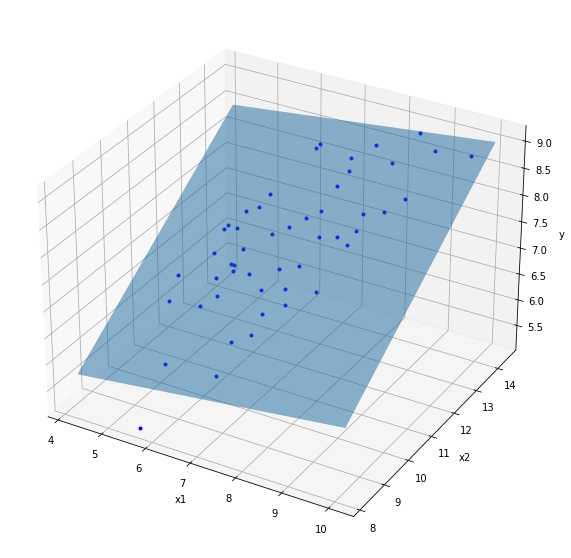

In [ ]:
theta = np.array([1.73156898, 0.09758965, 0.44002097])
x1 = np.linspace(x[:,0].min(), x[:,0].max(), 2)
x2 = np.linspace(x[:,1].min(), x[:,1].max(), 2)
x1, x2 = np.meshgrid(x1, x2)
y_pred = theta[0] + theta[1] * x1 + theta[2] * x2

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y_pred, rstride=1, cstride=1, alpha=0.5)
ax.plot(x[:, 0], x[:, 1], y[:,0], 'b.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

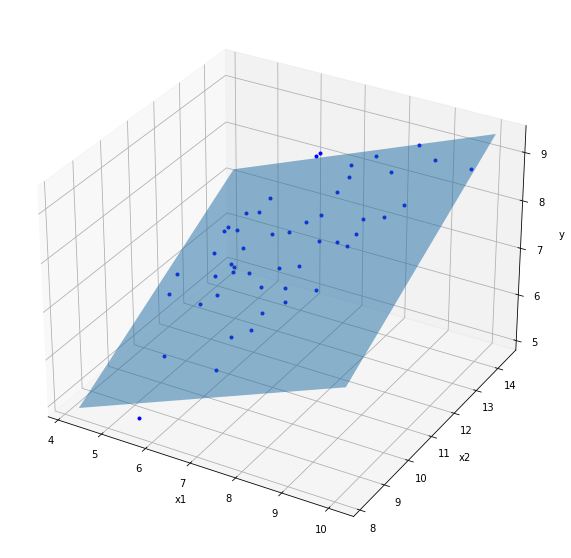

In [ ]:
theta = np.array([.1835, 0.3717, 0.3832])
x1 = np.linspace(x[:,0].min(), x[:,0].max(), 2)
x2 = np.linspace(x[:,1].min(), x[:,1].max(), 2)
x1, x2 = np.meshgrid(x1, x2)
y_pred = theta[0] + theta[1] * x1 + theta[2] * x2

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y_pred, rstride=1, cstride=1, alpha=0.5)
ax.plot(x[:, 0], x[:, 1], y[:,0], 'b.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

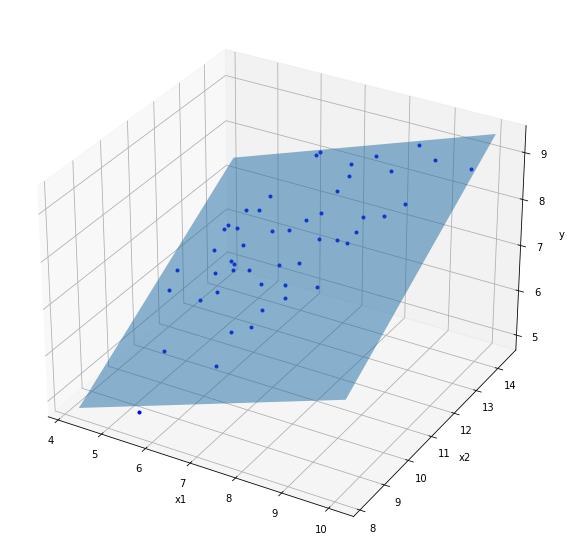

In [ ]:
theta = np.array([-.2524, 0.3394, 0.4373])
x1 = np.linspace(x[:,0].min(), x[:,0].max(), 2)
x2 = np.linspace(x[:,1].min(), x[:,1].max(), 2)
x1, x2 = np.meshgrid(x1, x2)
y_pred = theta[0] + theta[1] * x1 + theta[2] * x2

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y_pred, rstride=1, cstride=1, alpha=0.5)
ax.plot(x[:, 0], x[:, 1], y[:,0], 'b.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

#### iv) Realiza una predicción con tu modelo entrenado para la calificación que tendría un alumno si sabemos que estudió durante 12 horas para el examen y en un examen previo obtuvo 3 de calificación.

## Ciclo de Entrenamiento

In [ ]:
def train_epoch(dl, model, opt):

    # por cada lote
    for x, y_true in dl:
        
        # computamos logits
        y_lgts = model(x)
        
        # computamos la pérdida
        loss = F.mse_loss(y_lgts, y_true)
        
        # vaciamos los gradientes
        opt.zero_grad()
        
        # retropropagamos
        loss.backward()
        
        # actualizamos parámetros
        opt.step()


def eval_epoch(dl, model, num_batches=None):

    with torch.no_grad():

        # historiales
        losses= []

        # validación de la época con num_batches
        # si num_batches==None, se usan todos los lotes
        for x, y_true in dl:

            # computamos los logits
            y_lgts = model(x)

            # computamos los puntajes
            #y_prob = F.softmax(y_lgts, 1)

            # computamos la clases
            y_pred = y_lgts#torch.argmax(y_prob, 1)

            # computamos la pérdida
            loss = F.mse_loss(y_lgts, y_true)

            # computamos la exactitud
         

            # guardamos históricos
            losses.append(loss.item())
       

        # promediamos
        loss = np.mean(losses) * 100
     

        return loss
        
        
def train(model, trn_dl, lr=1e-3, epochs=100,
          trn_batches=None):

    # historiales
    loss_hist, acc_hist = [], []
    
    # optimizador
    opt = optim.SGD(model.parameters(), lr=lr)

    # ciclo de entrenamiento
    for epoch in range(epochs):

        # entrenamos la época
        train_epoch(trn_dl, model, opt)

        # evaluamos la época en entrenamiento
        trn_loss = eval_epoch(trn_dl, model, trn_batches)

        # guardamos historial
        loss_hist.append([trn_loss])
      

        # imprimimos progreso
        print(f'E{epoch:02} '
              f'loss=[{trn_loss:6.2f}] '
              )

    return loss_hist

In [ ]:
model_Medio_1 = FCN_Medio_1()
# entrenamos
loss_hist_Medio_1 = train(model_Medio_1, dl,0.001,20)

E00 loss=[3703.70] 
E01 loss=[2820.55] 
E02 loss=[1952.85] 
E03 loss=[1203.25] 
E04 loss=[652.22] 
E05 loss=[313.81] 
E06 loss=[140.02] 
E07 loss=[ 63.82] 
E08 loss=[ 34.32] 
E09 loss=[ 23.86] 
E10 loss=[ 20.36] 
E11 loss=[ 19.23] 
E12 loss=[ 18.87] 
E13 loss=[ 18.76] 
E14 loss=[ 18.72] 
E15 loss=[ 18.71] 
E16 loss=[ 18.70] 
E17 loss=[ 18.70] 
E18 loss=[ 18.70] 
E19 loss=[ 18.70] 


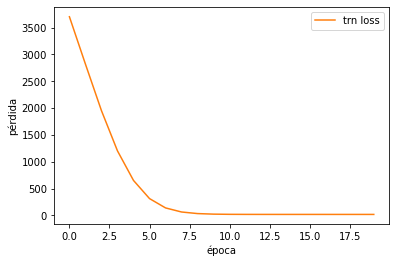

In [ ]:
plt.plot(loss_hist_Medio_1, 'tab:orange', label='trn loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

In [ ]:
model_Medio_2 = FCN_Medio_2()
# entrenamos
loss_hist_Medio_2 = train(model_Medio_2, dl,0.001,20)

E00 loss=[5401.16] 
E01 loss=[5401.16] 
E02 loss=[5401.16] 
E03 loss=[5401.16] 
E04 loss=[5401.16] 
E05 loss=[5401.16] 
E06 loss=[5401.16] 
E07 loss=[5401.16] 
E08 loss=[5401.16] 
E09 loss=[5401.16] 
E10 loss=[5401.16] 
E11 loss=[5401.16] 
E12 loss=[5401.16] 
E13 loss=[5401.16] 
E14 loss=[5401.16] 
E15 loss=[5401.16] 
E16 loss=[5401.16] 
E17 loss=[5401.16] 
E18 loss=[5401.16] 
E19 loss=[5401.16] 


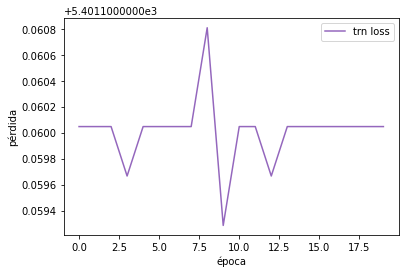

In [ ]:
plt.plot(loss_hist_Medio_2, 'tab:purple', label='trn loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

In [ ]:
model_Alto_1 = FCN_Alto_1()
# entrenamos
loss_hist_Alto_1 = train(model_Alto_1, dl,0.001,50)

E00 loss=[1356.76] 
E01 loss=[767.40] 
E02 loss=[385.09] 
E03 loss=[177.00] 
E04 loss=[ 80.53] 
E05 loss=[ 41.30] 
E06 loss=[ 26.80] 
E07 loss=[ 21.78] 
E08 loss=[ 20.10] 
E09 loss=[ 19.56] 
E10 loss=[ 19.38] 
E11 loss=[ 19.33] 
E12 loss=[ 19.31] 
E13 loss=[ 19.30] 
E14 loss=[ 19.30] 
E15 loss=[ 19.29] 
E16 loss=[ 19.29] 
E17 loss=[ 19.29] 
E18 loss=[ 19.29] 
E19 loss=[ 19.29] 
E20 loss=[ 19.29] 
E21 loss=[ 19.28] 
E22 loss=[ 19.28] 
E23 loss=[ 19.28] 
E24 loss=[ 19.28] 
E25 loss=[ 19.28] 
E26 loss=[ 19.27] 
E27 loss=[ 19.27] 
E28 loss=[ 19.27] 
E29 loss=[ 19.27] 
E30 loss=[ 19.27] 
E31 loss=[ 19.27] 
E32 loss=[ 19.26] 
E33 loss=[ 19.26] 
E34 loss=[ 19.26] 
E35 loss=[ 19.26] 
E36 loss=[ 19.26] 
E37 loss=[ 19.26] 
E38 loss=[ 19.25] 
E39 loss=[ 19.25] 
E40 loss=[ 19.25] 
E41 loss=[ 19.25] 
E42 loss=[ 19.25] 
E43 loss=[ 19.25] 
E44 loss=[ 19.24] 
E45 loss=[ 19.24] 
E46 loss=[ 19.24] 
E47 loss=[ 19.24] 
E48 loss=[ 19.24] 
E49 loss=[ 19.24] 


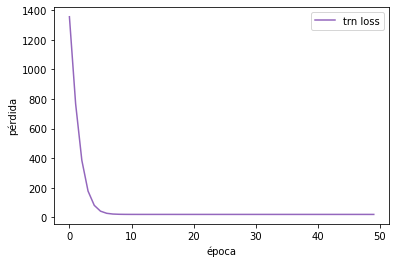

In [ ]:
plt.plot(loss_hist_Alto_1, 'tab:purple', label='trn loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

In [ ]:
model_Alto_2 = FCN_Alto_2()
# entrenamos
loss_hist_Alto_2 = train(model_Alto_2, dl,0.001,50)

E00 loss=[116.68] 
E01 loss=[ 59.44] 
E02 loss=[ 37.85] 
E03 loss=[ 29.69] 
E04 loss=[ 26.60] 
E05 loss=[ 25.42] 
E06 loss=[ 24.97] 
E07 loss=[ 24.79] 
E08 loss=[ 24.70] 
E09 loss=[ 24.66] 
E10 loss=[ 24.63] 
E11 loss=[ 24.61] 
E12 loss=[ 24.59] 
E13 loss=[ 24.57] 
E14 loss=[ 24.55] 
E15 loss=[ 24.53] 
E16 loss=[ 24.52] 
E17 loss=[ 24.50] 
E18 loss=[ 24.48] 
E19 loss=[ 24.46] 
E20 loss=[ 24.44] 
E21 loss=[ 24.42] 
E22 loss=[ 24.41] 
E23 loss=[ 24.39] 
E24 loss=[ 24.37] 
E25 loss=[ 24.35] 
E26 loss=[ 24.33] 
E27 loss=[ 24.31] 
E28 loss=[ 24.30] 
E29 loss=[ 24.28] 
E30 loss=[ 24.26] 
E31 loss=[ 24.24] 
E32 loss=[ 24.23] 
E33 loss=[ 24.21] 
E34 loss=[ 24.19] 
E35 loss=[ 24.17] 
E36 loss=[ 24.15] 
E37 loss=[ 24.14] 
E38 loss=[ 24.12] 
E39 loss=[ 24.10] 
E40 loss=[ 24.08] 
E41 loss=[ 24.07] 
E42 loss=[ 24.05] 
E43 loss=[ 24.03] 
E44 loss=[ 24.02] 
E45 loss=[ 24.00] 
E46 loss=[ 23.98] 
E47 loss=[ 23.96] 
E48 loss=[ 23.95] 
E49 loss=[ 23.93] 


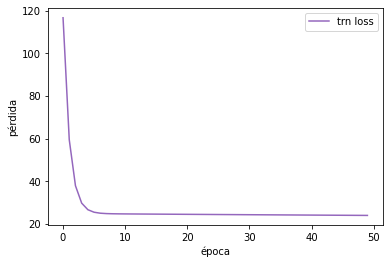

In [ ]:
plt.plot(loss_hist_Alto_2, 'tab:purple', label='trn loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

In [ ]:
list(model_Medio_1.named_parameters())

[('cls.0.weight',
  Parameter containing:
  tensor([[ 0.1671, -0.1502],
          [-0.2735, -0.5097]], requires_grad=True)),
 ('cls.0.bias',
  Parameter containing:
  tensor([ 0.0062, -0.4901], requires_grad=True)),
 ('cls.2.weight',
  Parameter containing:
  tensor([[-0.5795,  0.5886]], requires_grad=True)),
 ('cls.2.bias',
  Parameter containing:
  tensor([0.5628], requires_grad=True))]

In [ ]:
list(model_Medio_2.named_parameters())

[('cls.0.weight',
  Parameter containing:
  tensor([[-0.4570,  0.1210]], requires_grad=True)),
 ('cls.0.bias',
  Parameter containing:
  tensor([-0.2769], requires_grad=True))]

In [ ]:
list(model_Alto_1.named_parameters())

[('0.weight',
  Parameter containing:
  tensor([[-0.2141, -0.1479],
          [-0.3484, -0.2257]], requires_grad=True)),
 ('0.bias',
  Parameter containing:
  tensor([-0.0159, -0.4029], requires_grad=True)),
 ('2.weight',
  Parameter containing:
  tensor([[-0.4708,  0.2243]], requires_grad=True)),
 ('2.bias',
  Parameter containing:
  tensor([0.3682], requires_grad=True))]

In [ ]:
list(model_Alto_2.named_parameters())

[('0.weight',
  Parameter containing:
  tensor([[0.0355, 0.6195]], requires_grad=True)),
 ('0.bias',
  Parameter containing:
  tensor([-0.3830], requires_grad=True))]

In [ ]:
X_est=torch.from_numpy(np.array([[12,3],[12,3]],dtype="float32"))
Y_est=torch.from_numpy(np.array([[1],[1]],dtype="float32"))
ds_est = TensorDataset(X_est, Y_est)

def build_dl(batch_size=1, shuffle=True):
    return DataLoader(ds_est, batch_size=batch_size, shuffle=True)

# creamos un DataLoader
dl_est = build_dl()

In [ ]:
with torch.no_grad():
    for x_t, y_true in dl_est:
        y_pred_ = model_Medio_1(x_t)

In [ ]:
y_pred_

tensor([[-0.3418]])

In [ ]:
with torch.no_grad():
    for x_t, y_true in dl_est:
        y_pred_ = model_Medio_2(x_t)

In [ ]:
y_pred_

tensor([[0.]])

In [ ]:
with torch.no_grad():
    for x_t, y_true in dl_est:
        y_pred_ = model_Alto_1(x_t)

In [ ]:
y_pred_

tensor([[0.3682]])

In [ ]:
with torch.no_grad():
    for x_t, y_true in dl_est:
        y_pred_ = model_Alto_2(x_t)

In [ ]:
y_pred_

tensor([[1.9019]])

#### v) Discute las modificaciones que realizaste y las distintas configuraciones para los hiperparámetros que probaste.

Se plantearon 4 arquitecturas diferentes, 2 de alto nivel y 2 de medio nivel.

    1.- Nivel Medio 1 (2 capas funcion de activacion ReLU) 
    2.- Nivel Medio 2 (1 capa funcion de activacion ReLU) 
    3.- Nivel Alto 1 (2 capas funcion de activacion ReLU) 
    4.- Nivel Alto 2 (1 capa funcion de activacion ReLU) 
    
La segunda y cuarta aquitectura son una regresion lineal de 2 variables de la forma w1*x1 + w2*x2 + b, por lo que se esperaria que la red estime los parametros de la regresion lineal, pero para el entrenamiento hecho los parametros y el error no mejoraron al grado de estimar una regresion linea usando maxima verosimilitud

Una regresion lineal usando maximaverosimilitud minimiza el error cuadratico medio por lo que se tiene una solucion al modelo, al intentar aproximar esos parametros por medio de la red densa observamos que 

    1.- La red es sencible a pesos iniciales, por lo que si tenemos W muy altas estas hacen que la red no converja rapidamente
    2.- La red se queda estancada a lo largo de las epocas evitando llegar al optimo (optimo calculado por regresion lineal por         maxima verosimilitud)
